# File Imports for both parts

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2021.csv to 2021.csv
Saving 2020.csv to 2020.csv
Saving 2019.csv to 2019.csv
Saving 2018.csv to 2018.csv
Saving 2017.csv to 2017.csv
Saving 2022.csv to 2022.csv
Saving Keyword_data - Keyword_data.csv to Keyword_data - Keyword_data.csv


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# For Task 1 - Keyword Data
kw_data = pd.read_csv('Keyword_data - Keyword_data.csv')

# For Task 2 - All the year files
data_2017 = pd.read_csv('2017.csv')
data_2018 = pd.read_csv('2018.csv')
data_2019 = pd.read_csv('2019.csv')
data_2020 = pd.read_csv('2020.csv')
data_2021 = pd.read_csv('2021.csv')
data_2022 = pd.read_csv('2022.csv')


# Task 1

### Write a Python code to extract keyword data from the above file and convert it to a weighted adjacency matrix.

In [ ]:
data = kw_data

## Cleaning data
df = data[data['Title'].notna()] # Create a new df that only includes rows that have article titles
df = df[df['Keyword 1'].notna()] # Drop all the dates -- they do not have a Keyword 1
df.reset_index(drop = True) # Reset the numerical index so it starts from 0

## Finding unique words
df_no_title = df.drop(columns = ['Title']) # Do not need title column for unique words
stacks = df_no_title.stack() # stack the columns together
df_test = pd.DataFrame(stacks) # Turn the column into a dataframe so I can find unique values
words = df_test[0].unique() # List the unique words

## Get information for matrix
df_original = df # Callback to the original dataframe
rows = len(df_original) # Get the number of rows in the original dataframe
size = len(words) # Get the number of unique words
mat = np.zeros((size,size)) # Create a zero matrix with the same number of unique words

## Append the matrix
for row in range(0,rows):
  try_vals = df_original.iloc[row,:] # Get the individual row data
  try_vals = list(try_vals) # Make the original row into a list so that it is easier to manipulate
  ## Start matrix -- add 1 to a(i,j) each time both words show up in a row
  for i in range(0,size): 
    for j in range(0,size): 
      if i == j:
        pass
      elif words[i] in try_vals:
        if words[j] in try_vals:
          mat[i,j] += 1

## Matrix
mat = pd.DataFrame(mat)
mat.columns = words
mat.index = words
mat

,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,...,WAGE payment systems,FINANCIAL management,CROSS-functional teams,GROUP identity,SERVICE industries -- Management,CUSTOMER relations,PRODUCTION management,LABOR process,CUSTOMER orientation,MARKETING strategy
EQUITY,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ORGANIZATIONAL sociology,1.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,4.0,6.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
PERFORMANCE,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
META-analysis,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PSYCHOMETRICS,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUSTOMER relations,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
PRODUCTION management,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
LABOR process,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
CUSTOMER orientation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


### Read the adjacency matrix and convert it into a weighted network ?????

In [ ]:
#importing necessary libraries for keyword networks graphical representation
import matplotlib.pyplot as plt
import networkx as nx
V = nx.from_pandas_adjacency(mat)

In [ ]:
# to find the Degree of the graph
V.degree

DegreeView({'EQUITY': 10, 'ORGANIZATIONAL sociology': 66, 'PERFORMANCE': 23, 'META-analysis': 10, 'PSYCHOMETRICS': 10, 'ORGANIZATIONAL research': 24, 'FINANCIAL performance': 19, 'AGENCY theory': 38, 'ORGANIZATIONAL effectiveness': 104, 'ORGANIZATIONAL behavior': 166, 'CORPORATE governance': 62, 'DIVERSIFICATION in industry': 18, 'BUSINESS planning': 29, 'PERFORMANCE standards': 9, 'EMPLOYEES -- Rating of': 9, 'CORPORATE culture': 9, 'STRATEGIC planning': 66, 'MANAGEMENT science': 102, 'MANAGEMENT research': 17, 'PRODUCT management': 24, 'INTERORGANIZATIONAL relations': 24, 'INTERGROUP relations': 16, 'BUSINESS communication': 9, 'INVESTMENTS': 25, 'SUPPLY chains': 9, 'KNOWLEDGE management': 19, 'INTERORGANIZATIONAL networks': 18, 'GROUP decision making': 27, 'INTELLECTUAL capital': 20, 'EXECUTIVE compensation': 31, 'WAGES': 17, 'HUMAN capital': 17, 'LABOR economics': 17, 'PERSONNEL management': 93, 'CONTINGENCY theory (Management)': 9, 'COMPENSATION management': 19, 'EXECUTIVE ability

In [ ]:
V.degree(weight='weight')

DegreeView({'EQUITY': 10.0, 'ORGANIZATIONAL sociology': 96.0, 'PERFORMANCE': 29.0, 'META-analysis': 10.0, 'PSYCHOMETRICS': 10.0, 'ORGANIZATIONAL research': 28.0, 'FINANCIAL performance': 21.0, 'AGENCY theory': 48.0, 'ORGANIZATIONAL effectiveness': 144.0, 'ORGANIZATIONAL behavior': 265.0, 'CORPORATE governance': 85.0, 'DIVERSIFICATION in industry': 20.0, 'BUSINESS planning': 31.0, 'PERFORMANCE standards': 9.0, 'EMPLOYEES -- Rating of': 9.0, 'CORPORATE culture': 9.0, 'STRATEGIC planning': 80.0, 'MANAGEMENT science': 136.0, 'MANAGEMENT research': 19.0, 'PRODUCT management': 28.0, 'INTERORGANIZATIONAL relations': 27.0, 'INTERGROUP relations': 17.0, 'BUSINESS communication': 9.0, 'INVESTMENTS': 25.0, 'SUPPLY chains': 9.0, 'KNOWLEDGE management': 20.0, 'INTERORGANIZATIONAL networks': 19.0, 'GROUP decision making': 30.0, 'INTELLECTUAL capital': 20.0, 'EXECUTIVE compensation': 36.0, 'WAGES': 18.0, 'HUMAN capital': 18.0, 'LABOR economics': 18.0, 'PERSONNEL management': 126.0, 'CONTINGENCY theor

In [ ]:
V.edges()

EdgeView([('EQUITY', 'ORGANIZATIONAL sociology'), ('EQUITY', 'PERFORMANCE'), ('EQUITY', 'META-analysis'), ('EQUITY', 'PSYCHOMETRICS'), ('EQUITY', 'ORGANIZATIONAL research'), ('EQUITY', 'FINANCIAL performance'), ('EQUITY', 'AGENCY theory'), ('EQUITY', 'ORGANIZATIONAL effectiveness'), ('EQUITY', 'ORGANIZATIONAL behavior'), ('EQUITY', 'CORPORATE governance'), ('ORGANIZATIONAL sociology', 'PERFORMANCE'), ('ORGANIZATIONAL sociology', 'META-analysis'), ('ORGANIZATIONAL sociology', 'PSYCHOMETRICS'), ('ORGANIZATIONAL sociology', 'ORGANIZATIONAL research'), ('ORGANIZATIONAL sociology', 'FINANCIAL performance'), ('ORGANIZATIONAL sociology', 'AGENCY theory'), ('ORGANIZATIONAL sociology', 'ORGANIZATIONAL effectiveness'), ('ORGANIZATIONAL sociology', 'ORGANIZATIONAL behavior'), ('ORGANIZATIONAL sociology', 'CORPORATE governance'), ('ORGANIZATIONAL sociology', 'MANAGEMENT science'), ('ORGANIZATIONAL sociology', 'INTERORGANIZATIONAL relations'), ('ORGANIZATIONAL sociology', 'INVESTMENTS'), ('ORGANIZA

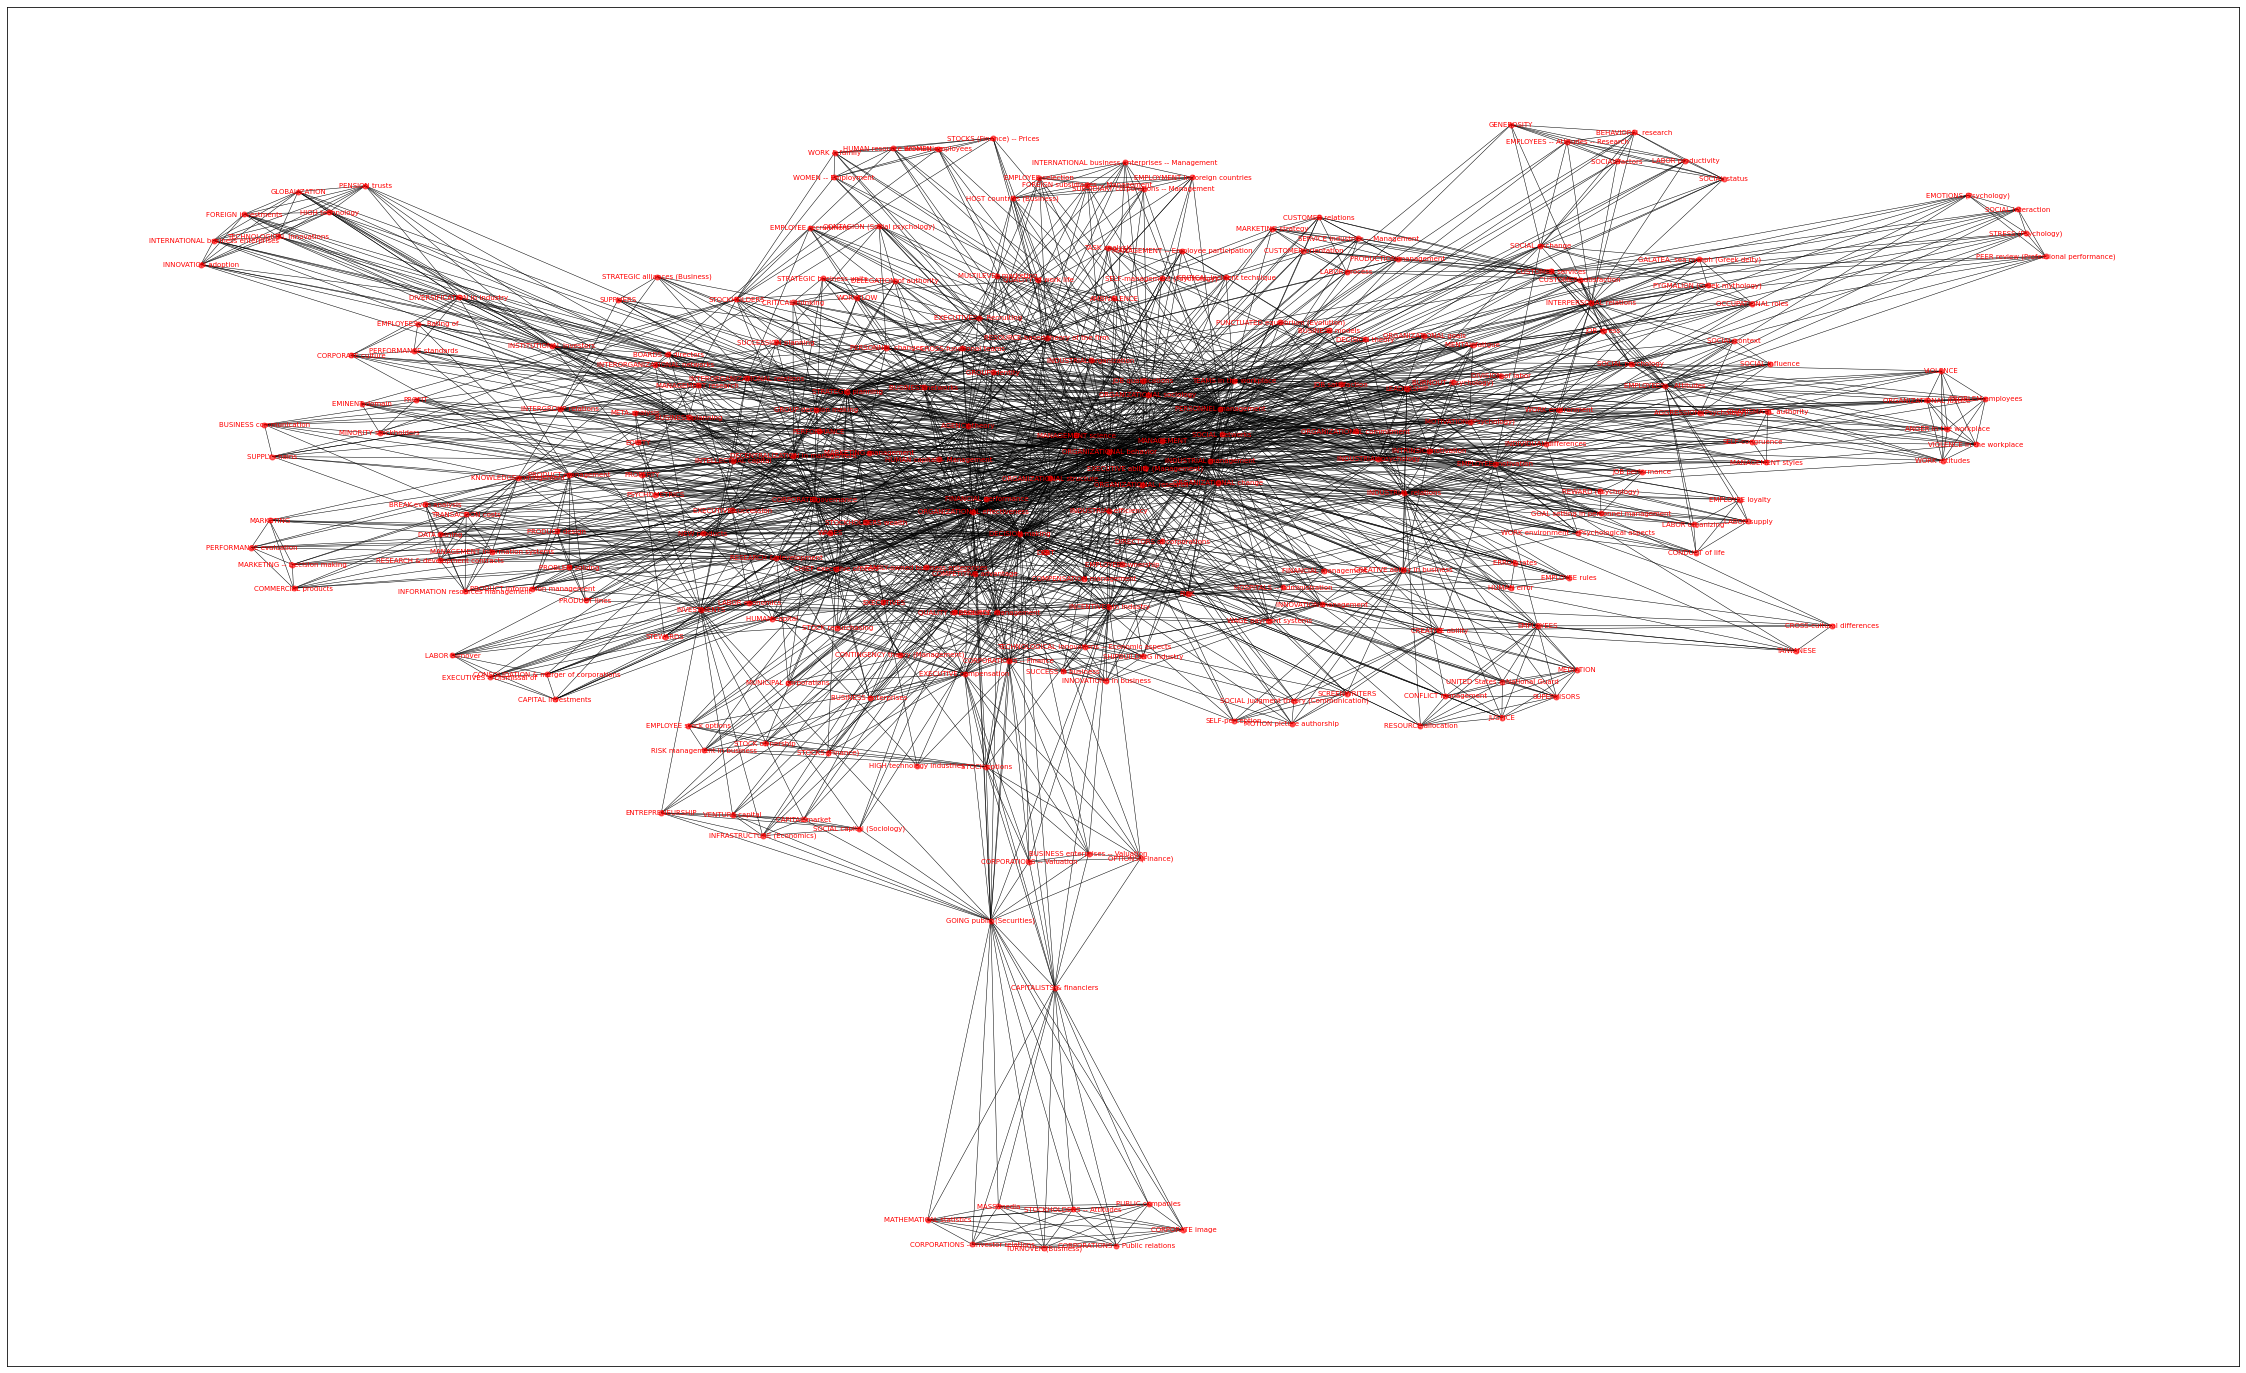

In [ ]:
#plotting keyword networks
plt.figure(figsize=(40,25))
graph_pos = nx.spring_layout(V)
graph_edges = V.edges()
nx.draw_networkx_nodes(V, graph_pos, node_size=25, node_color='red', alpha=0.6)
nx.draw_networkx_edges(V, graph_pos,width=0.5)
nx.draw_networkx_labels(V, graph_pos, font_size=7, font_family='sans-serif',font_color='red')

plt.show()

In [ ]:
# ??????

### Compute node degree and strength

In [ ]:
## Node Degree
degrees = [] 
for i in range(len(words)):
  row = mat.iloc[i,:] # Choose a row
  temp_degree = 0 # Reset for each row
  for x in row:
    if x != 0: # If the value is not empty, add one to the temp degree
      temp_degree += 1 
  degrees.append(temp_degree) # Append the value into the original empty list

## Node Strength
strengths = []
for i in range(len(words)): 
  row = mat.iloc[i,:] # Choose a row
  temp_strength = 0 # Reset value for each row
  for x in row:
    temp_strength += x # Add each value
  strengths.append(temp_strength) # Append the value into the original empty list

### Show the top 10 nodes by degree and top 10 nodes by strength

In [ ]:
## Dataframe with Degree and Strength
word_info = pd.DataFrame(
    {'Words': words,
     'Degrees': degrees,
     'Strengths': strengths
    })

In [ ]:
## Top 10 words by Strength

top_strength = word_info.sort_values('Strengths', ascending=False)
top_strength.head(10)

,Words,Degrees,Strengths
9,ORGANIZATIONAL behavior,166,265.0
8,ORGANIZATIONAL effectiveness,104,144.0
17,MANAGEMENT science,102,136.0
33,PERSONNEL management,93,126.0
43,DECISION making,90,112.0
66,ORGANIZATIONAL structure,74,107.0
1,ORGANIZATIONAL sociology,66,96.0
10,CORPORATE governance,62,85.0
69,INDUSTRIAL management,64,84.0
16,STRATEGIC planning,66,80.0


In [ ]:
## Top 10 words by Degrees

top_degree = word_info.sort_values('Degrees', ascending=False)
top_degree.head(10)

,Words,Degrees,Strengths
9,ORGANIZATIONAL behavior,166,265.0
8,ORGANIZATIONAL effectiveness,104,144.0
17,MANAGEMENT science,102,136.0
33,PERSONNEL management,93,126.0
43,DECISION making,90,112.0
66,ORGANIZATIONAL structure,74,107.0
16,STRATEGIC planning,66,80.0
1,ORGANIZATIONAL sociology,66,96.0
69,INDUSTRIAL management,64,84.0
10,CORPORATE governance,62,85.0


### Show the top 10 node pairs by weight ?????

In [ ]:
# I know that you need to connect the plots and then compare the a(i,j) values

### Plot average strength on y-axis and degree on x-axis ?????

In [ ]:
# Avg strength = strength/degree ??

# Task 2

### Create the Cleaned Dataframe

In [ ]:
## Create one giant dataframe will all the information from all the files
lst_csv = [data_2017,data_2018,data_2019,data_2020,data_2021,data_2022]
result = pd.concat(lst_csv) # Concat all the data into one giant frame
df_tweets = result[['date','tweet']] # Create a new dataframe with only the date and tweet itself

## Get only the data for the tweets from 2017-2022
df_tweets['date'] = pd.to_datetime(df_tweets['date']) # Convert to datetime so I can find more information
start_date = '2016-12-31' # Want all the data after this specific date
date_range = (df_tweets['date'] > start_date) # Setting the date range of 2017 - 2022
df_filtered = df_tweets.loc[date_range] # Filter based on the range
df_filtered['year'] = pd.DatetimeIndex(df_filtered['date']).year # We are treating each year as a page, so create a new column for the year
df_filtered.head()

<ipython-input-6-514385a6eae8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['date'] = pd.to_datetime(df_tweets['date']) # Convert to datetime so I can find more information
<ipython-input-6-514385a6eae8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = pd.DatetimeIndex(df_filtered['date']).year # We are treating each year as a page, so create a new column for the year


,date,tweet,year
0,2017-12-27 00:32:57,@neilsiegel @Tesla Coming very soon,2017
1,2017-12-26 20:14:45,@Kreative Vastly better maps/nav coming soon,2017
2,2017-12-26 20:10:43,@dd_hogan Ok,2017
3,2017-12-26 18:57:03,@Jason @Tesla Sure,2017
4,2017-12-26 18:55:42,"@kabirakhtar Yeah, it’s terrible. Had to upgra...",2017


In [ ]:
## Make sure that the libraries are all downloaded -- sometimes they are not
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


## Create a definition for removing all the mentions, hashtags, special characters, numbers and urls
def cleaning(tweet):
  tweet = re.sub("@[A-Za-z0-9_]+","", tweet) # remove @mentions
  tweet = re.sub("#[A-Za-z0-9_]+","", tweet) # remove #hashtags
  tweet = re.sub(r"http\S+", "", tweet) # Remove websites with http
  tweet = re.sub(r"www.\S+", "", tweet) # Remove websites with www.
  tweet = tweet.lower() # Set all the words to lower-case
  tweet = re.sub("[^a-z]"," ", tweet) # remove all the non-words left
  return tweet

## Create a definition for removing all the stopwords in the nltk library
def no_stop(tweet):
  stop_words = set(stopwords.words('english')) # Get the list of stopwords
  stop_words = list(stop_words) # Set stopwords into a list so it is easier to manipulate
  tweet = [w for w in tweet if not w in stop_words] # Get rid of the stopwords
  return tweet

## Applying the definition to all the tweets
df_cleaned = df_filtered.copy()

df_cleaned['tweet'] = df_cleaned['tweet'].map(lambda x: cleaning(x)) # Clean data first
df_cleaned['tweet'] = df_cleaned['tweet'].map(lambda x: word_tokenize(x)) # Tokenize the words
df_cleaned['tweet'] = df_cleaned['tweet'].map(lambda x: no_stop(x)) # Remove the stop words
df_cleaned.sample(10)

,date,tweet,year
196,2021-12-12 00:00:00,"[sine, qua, non, non]",2021
5105,2018-01-29 21:02:18,"[hard, keep, future, product, releases, secret]",2018
2236,2018-01-31 23:43:40,[yes],2018
700,2017-06-01 07:41:42,[yeah],2017
2090,2018-03-21 11:05:20,"[lori, ridiculous, creating, rocket, company, ...",2018
2986,2018-12-18 22:14:35,"[boring, product, launch, streamed, live, pm, ...",2018
2597,2020-04-07 06:29:35,"[coming, soon]",2020
6447,2018-12-09 01:31:39,"[fairly, heavy, metal, extremely, strong]",2018
8044,2018-05-22 04:43:32,"[wanted, say, thanks, tesla, supporters, damn,...",2018
885,2018-08-05 20:47:38,"[early, access, bugs, usually, minor, never, k...",2018


### Compute word frequencies for each year. Exclude the stop words

The stop words were already removed in the previous code

In [ ]:
## Split the dataframe into different frames based on their year
df_cleaned['year'] = df_cleaned['year'].astype(int)

df_year_2017 = df_cleaned[df_cleaned['year'] == 2017]
df_year_2018 = df_cleaned[df_cleaned['year'] == 2018]
df_year_2019 = df_cleaned[df_cleaned['year'] == 2019]
df_year_2020 = df_cleaned[df_cleaned['year'] == 2020]
df_year_2021 = df_cleaned[df_cleaned['year'] == 2021]
df_year_2022 = df_cleaned[df_cleaned['year'] == 2022]

## Get the word frequencies definition
def word_freq(df):
  test = list([i for j in df for i in j])
  word_dist = nltk.FreqDist(test)
  rslt = pd.DataFrame(word_dist.most_common(),
                      columns=['Word', 'Frequency'])
  rslt = rslt.sort_values('Frequency', ascending = False)
  return(rslt)

## Word Frequencies by year
freq_2017 = word_freq(df_year_2017['tweet'])
freq_2018 = word_freq(df_year_2018['tweet'])
freq_2019 = word_freq(df_year_2019['tweet'])
freq_2020 = word_freq(df_year_2020['tweet'])
freq_2021 = word_freq(df_year_2021['tweet'])
freq_2022 = word_freq(df_year_2022['tweet'])

### Show top 10 words (for each year) by the highest value of word frequency

In [ ]:
lst_freq = [freq_2017,freq_2018,freq_2019,freq_2020,freq_2021,freq_2022]
years = np.arange(2017,2023)

for i in range(0,len(lst_freq)):
  print('\n The most frequently used words in ' + str(years[i]) + ' were: \n')
  print(lst_freq[i].head(10))


 The most frequently used words in 2017 were: 

    Word  Frequency
0    amp        267
1  tesla        222
2  model        177
3    yes        162
4   good        159
5   like        147
6    one        138
7  first        129
8   next        129
9   yeah        117

 The most frequently used words in 2018 were: 

     Word  Frequency
0     amp       1581
1   tesla        877
2     car        363
3     yes        324
4    good        308
5   model        294
6    like        285
7   would        231
8  people        222
9    even        195

 The most frequently used words in 2019 were: 

       Word  Frequency
0       amp        970
1     tesla        504
2       yes        307
3     would        198
4     great        193
5  starship        189
6      like        170
7      good        169
8      high        148
9      much        144

 The most frequently used words in 2020 were: 

    Word  Frequency
0    amp        578
1  tesla        191
2    yes        160
3  great        128


In [ ]:
##Plottting Histogram

In [ ]:
freq_2018

,Word,Frequency
0,amp,1581
1,tesla,877
2,car,363
3,yes,324
4,good,308
...,...,...
3342,adsorbed,3
3343,soil,3
3344,artificial,3
3345,natural,3


In [ ]:
freq_2018['rank'] = freq_2018.groupby(["Frequency"]).rank(ascending = False, method = 'dense')
freq_2018.sort_values(by = ['rank'], ascending = False)
freq_2018.drop(['rank'], axis=1, inplace=True)

ValueError: ignored

In [ ]:
freq_2018.drop(['rank'], axis=1, inplace=True)

In [ ]:
freq_2017['Year'] = pd.Series(["2017" for x in range(len(freq_2017.index))])
freq_2017

,Word,Frequency,Year
0,amp,267,2017
1,tesla,222,2017
2,model,177,2017
3,yes,162,2017
4,good,159,2017
...,...,...,...
1883,complacency,3,2017
1882,suggesting,3,2017
1881,targets,3,2017
1880,proximity,3,2017


In [ ]:
freq_2018['Year'] = pd.Series(["2018" for x in range(len(freq_2018.index))])
freq_2018

,Word,Frequency,Year
0,amp,1581,2018
1,tesla,877,2018
2,car,363,2018
3,yes,324,2018
4,good,308,2018
...,...,...,...
3342,adsorbed,3,2018
3343,soil,3,2018
3344,artificial,3,2018
3345,natural,3,2018


In [ ]:
freq_2019['Year'] = pd.Series(["2019" for x in range(len(freq_2019.index))])
freq_2019
freq_2020['Year'] = pd.Series(["2020" for x in range(len(freq_2020.index))])
freq_2020
freq_2021['Year'] = pd.Series(["2021" for x in range(len(freq_2021.index))])
freq_2021
freq_2022['Year'] = pd.Series(["2022" for x in range(len(freq_2022.index))])
freq_2022

,Word,Frequency,Year
0,amp,80,2022
1,tesla,62,2022
2,people,34,2022
3,would,32,2022
4,yes,32,2022
...,...,...,...
799,river,2,2022
800,horror,2,2022
801,movie,2,2022
802,resonate,2,2022


In [ ]:
##cocatenating the dataframes together 
df_total = pd.concat([freq_2017,freq_2018,freq_2019,freq_2020,freq_2021,freq_2022], axis = 0)

In [ ]:
df_total

,Word,Frequency,Year,Rank
0,amp,267,2017,1.0
1,tesla,222,2017,2.0
2,model,177,2017,3.0
3,yes,162,2017,4.0
4,good,159,2017,5.0
...,...,...,...,...
799,river,2,2022,NaN
800,horror,2,2022,NaN
801,movie,2,2022,NaN
802,resonate,2,2022,NaN


In [ ]:
freq_2017['Rank'] = freq_2017.groupby(['Year'])['Frequency'].rank(ascending=False,method='dense')
freq_2017.sort_values(by=['Year','Frequency'],ascending=False)

,Word,Frequency,Year,Rank
0,amp,267,2017,1.0
1,tesla,222,2017,2.0
2,model,177,2017,3.0
3,yes,162,2017,4.0
4,good,159,2017,5.0
...,...,...,...,...
1883,complacency,3,2017,44.0
1882,suggesting,3,2017,44.0
1881,targets,3,2017,44.0
1880,proximity,3,2017,44.0


In [ ]:
### Create a definition for creating a new graph each year
def bigram_net(df):
  df['bigram'] = df['tweet'].apply(lambda row: list(nltk.ngrams(row, 2))) # Create a new column that includes the bigrams of the row
  lst_words = (list(set([a for b in df['bigram'].tolist() for a in b]))) # Make the bigrams into a list
  bigrams_df = pd.DataFrame(lst_words) # Create a new dataframe using the bigrams: two columns for the two bigrams
  bigrams_df.columns =['Word 1', 'Word 2'] # Rename the columns
  g = nx.from_pandas_edgelist(bigrams_df, source = 'Word 1', target = 'Word 2') # Create the edges using the two words
  pos = nx.random_layout(g) # Create the network using a random layout
  nx.draw_networkx(g,pos)
  plt.title("Bigram network data", fontsize = 80)
  plt.gcf().set_size_inches(60, 60)
  plt.show()

In [ ]:
print('Bigram for 2017')
bigram_net(df_year_2017)
print('Bigram for 2018')
bigram_net(df_year_2018)
print('Bigram for 2019')
bigram_net(df_year_2019)
print('Bigram for 2020')
bigram_net(df_year_2020)
print('Bigram for 2021')
bigram_net(df_year_2021)

Bigram for 2017


<ipython-input-35-ff01c4f5d3d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bigram'] = df['tweet'].apply(lambda row: list(nltk.ngrams(row, 2))) # Create a new column that includes the bigrams of the row


NameError: ignored